# Project 4340 - Baseball

## Business Problem

Our business problem is discovering what factors contribute and produce a lot of wins for a baseball team. The goal for baseball teams are to win as many games as possible and make the playoffs. We are interested in looking at what makes a team win games and get into the playoffs. Making the playoffs and winning more games results in higher revenue for both the organization and players.

## Business Questions
- What factors affect wins the most?
- What factors determine whether a team makes it to the playoffs?

## Variable Description
- Team: Team name
- League: American League or National League
- Year: year
- RS: Runs scored
- RA: Runs allowed
- W: Number of wins
- OBP: On base percentage
- SLG: Slugging percentage
- BA: Batting average
- Playoff: Whether or not a team makes it to the playoffs
- RankSeason: The teams ranking over the course of the season
- RankPlayoffs: The teams ranking in the playoffs
- G: Games played
- OOBP: Opponent base percentage
- OSLG: Opponent slugging percentage

## Load Data

In [1]:
# load packages
import numpy as np # For matrix and numerical calculations; foundation of pandas
import pandas as pd # For dataframe manipulation
import seaborn as sns # For visualizations and plotting
import matplotlib.pyplot as plt # For visualizations and plotting
%matplotlib inline
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
# import .csv file
bb_df = pd.read_csv('baseball.csv')
# peak at first 10 rows
bb_df.head(10)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


In [3]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [36]:
bb_df.shape

(1232, 15)

## EDA

In [6]:
# get descriptive statistics
bb_df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [7]:
# get correlations
bb_df.corr()

C:\Users\srini\AppData\Local\Temp\ipykernel_42280\2634786613.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bb_df.corr()


,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744
RankSeason,0.385219,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111
RankPlayoffs,0.443967,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089


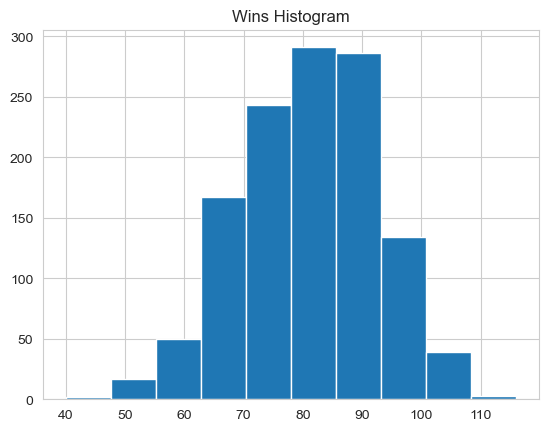

In [33]:
# plot dependent variable - wins
bb_df.W.hist().set(title='Wins Histogram')
plt.show()

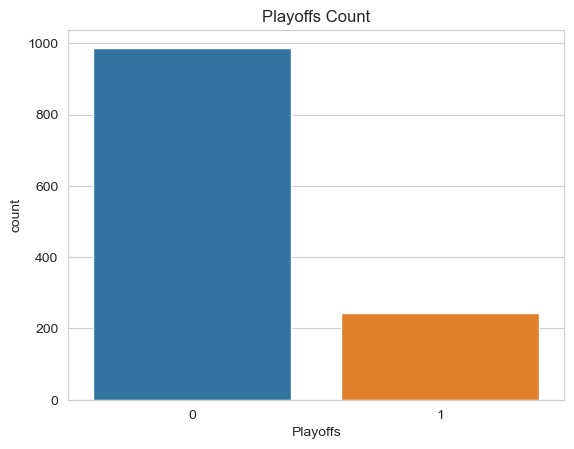

In [34]:
# plot dependent variable - playoffs
sns.countplot(x='Playoffs', data=bb_df).set(title='Playoffs Count')
plt.show()

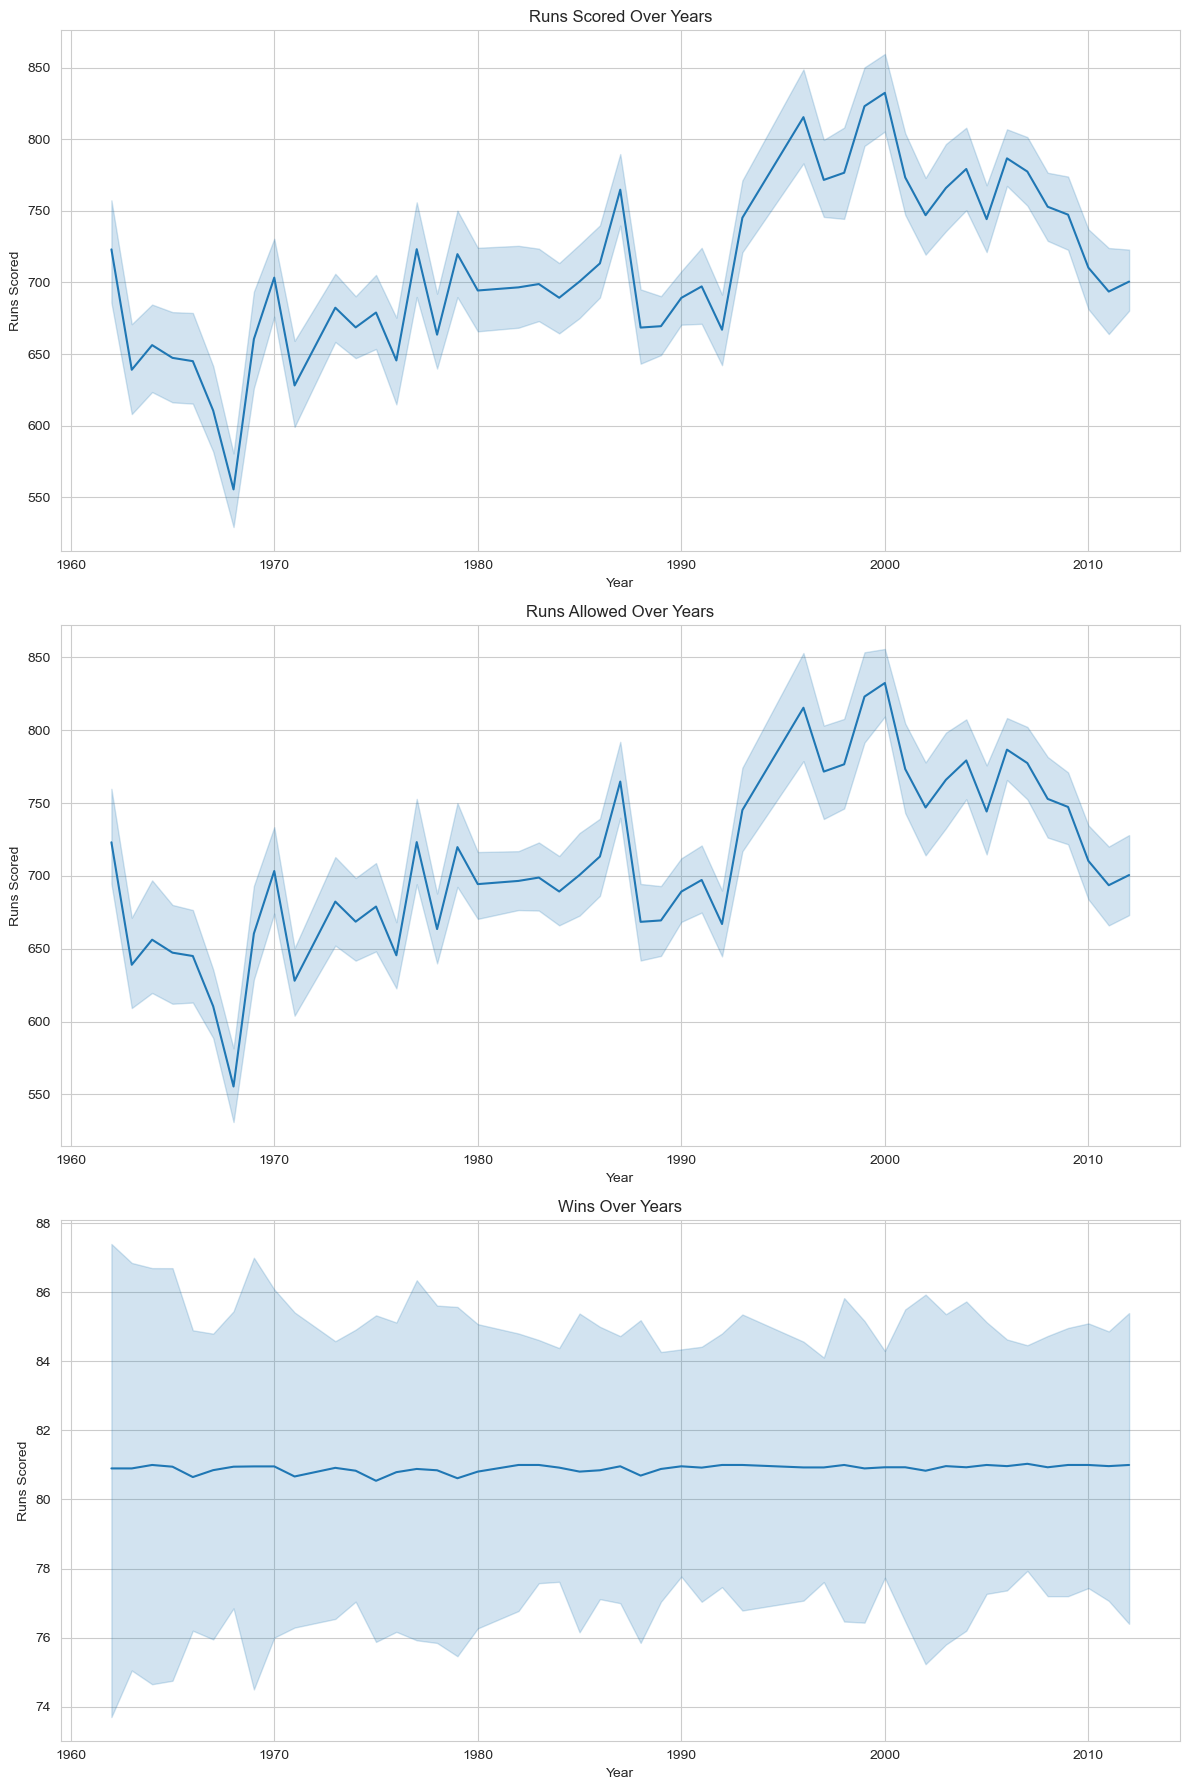

In [8]:

# Setting up the visualisation style
sns.set_style("whitegrid")

# Creating a correlation heatmap to see relationships between numerical features
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_raw.corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Correlation Heatmap of Baseball Dataset Features")
# plt.show()

# Plotting trends over the years for key statistics: Runs Scored, Runs Allowed, Wins
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

sns.lineplot(data=bb_df, x="Year", y="RS", ax=axes[0])
axes[0].set_title('Runs Scored Over Years')
axes[0].set_xlabel('Year')  # X-axis label for the first plot
axes[0].set_ylabel('Runs Scored')  # Y-axis label for the first plot

sns.lineplot(data=bb_df, x="Year", y="RA", ax=axes[1])
axes[1].set_title('Runs Allowed Over Years')
axes[1].set_xlabel('Year')  # X-axis label for the first plot
axes[1].set_ylabel('Runs Scored')  # Y-axis label for the first plot

sns.lineplot(data=bb_df, x="Year", y="W", ax=axes[2])
axes[2].set_title('Wins Over Years')
axes[2].set_xlabel('Year')  # X-axis label for the first plot
axes[2].set_ylabel('Runs Scored')  # Y-axis label for the first plot

plt.tight_layout()
plt.show()


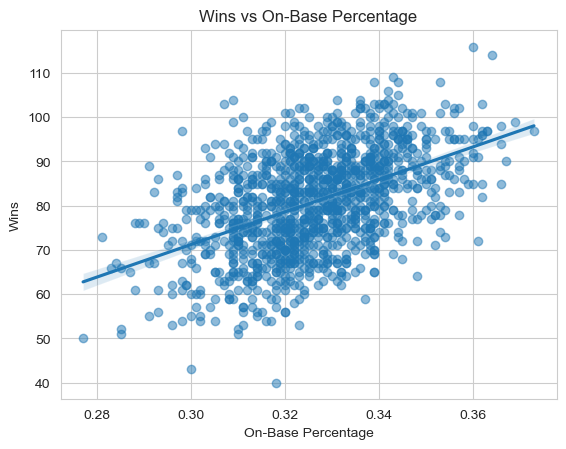

In [9]:
sns.regplot(data=bb_df, x="OBP", y="W", scatter_kws={'alpha':0.5})
plt.title("Wins vs On-Base Percentage")  # Replace with your desired title
plt.xlabel("On-Base Percentage")  # Replace with your desired x-axis label
plt.ylabel("Wins")  # Replace with your desired y-axis label
plt.show()

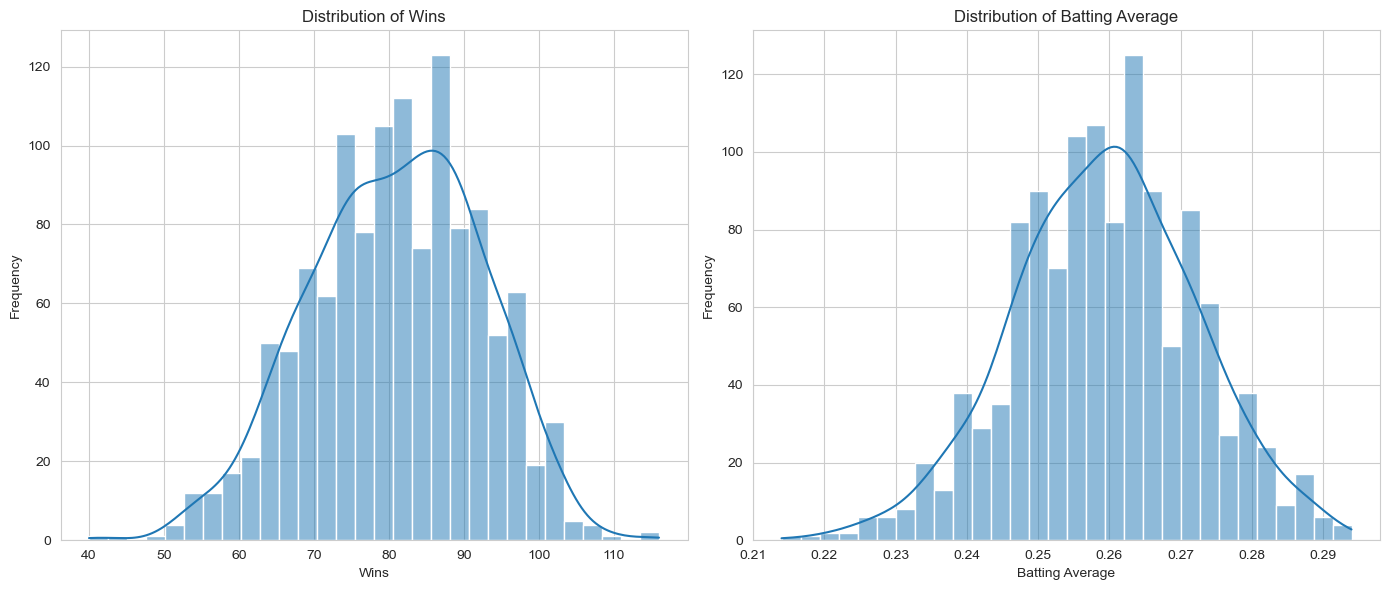

In [13]:
# Creating histograms for the distribution of wins and batting averages

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram for Wins
sns.histplot(bb_df['W'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Wins')
axes[0].set_xlabel('Wins')
axes[0].set_ylabel('Frequency')

# Histogram for Batting Average
sns.histplot(bb_df['BA'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Batting Average')
axes[1].set_xlabel('Batting Average')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


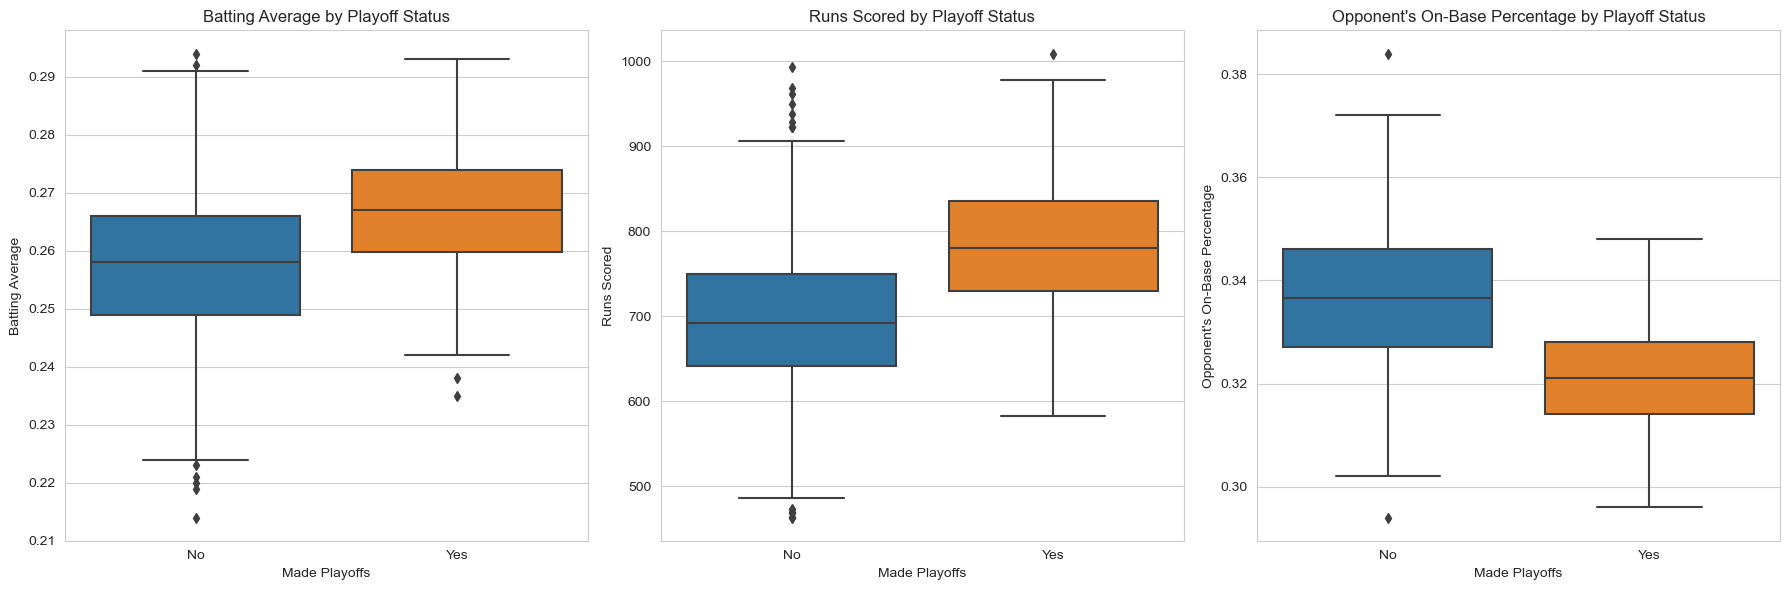

In [32]:
# Creating box plots to compare playoff and non-playoff teams' performance in various stats

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for Batting Average
sns.boxplot(x='Playoffs', y='BA', data=bb_df, ax=axes[0])
axes[0].set_title('Batting Average by Playoff Status')
axes[0].set_xlabel('Made Playoffs')
axes[0].set_ylabel('Batting Average')
axes[0].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

# Box plot for Runs Scored
sns.boxplot(x='Playoffs', y='RS', data=bb_df, ax=axes[1])
axes[1].set_title('Runs Scored by Playoff Status')
axes[1].set_xlabel('Made Playoffs')
axes[1].set_ylabel('Runs Scored')
axes[1].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

# Box plot for Opponent's On-Base Percentage (OOBP)
sns.boxplot(x='Playoffs', y='OOBP', data=bb_df, ax=axes[2])
axes[2].set_title("Opponent's On-Base Percentage by Playoff Status")
axes[2].set_xlabel('Made Playoffs')
axes[2].set_ylabel("Opponent's On-Base Percentage")
axes[2].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

plt.tight_layout()
plt.show()


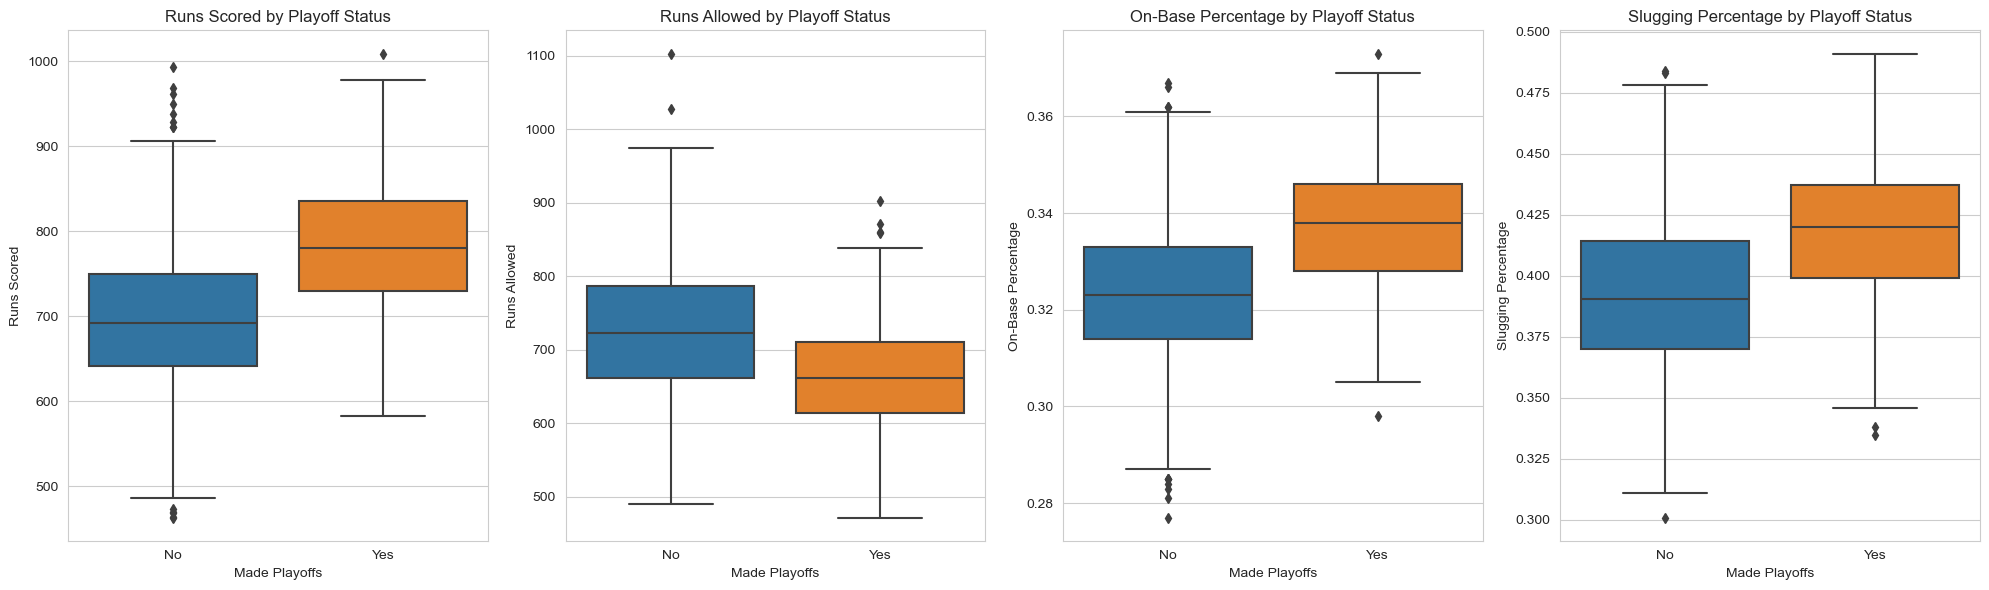

In [10]:
# Creating box plots to compare playoff and non-playoff teams' performance in Runs Scored, Runs Allowed, OBP, and SLG

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Box plot for Runs Scored (RS)
sns.boxplot(x='Playoffs', y='RS', data=bb_df, ax=axes[0])
axes[0].set_title('Runs Scored by Playoff Status')
axes[0].set_xlabel('Made Playoffs')
axes[0].set_ylabel('Runs Scored')
axes[0].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

# Box plot for Runs Allowed (RA)
sns.boxplot(x='Playoffs', y='RA', data=bb_df, ax=axes[1])
axes[1].set_title('Runs Allowed by Playoff Status')
axes[1].set_xlabel('Made Playoffs')
axes[1].set_ylabel('Runs Allowed')
axes[1].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

# Box plot for On-Base Percentage (OBP)
sns.boxplot(x='Playoffs', y='OBP', data=bb_df, ax=axes[2])
axes[2].set_title('On-Base Percentage by Playoff Status')
axes[2].set_xlabel('Made Playoffs')
axes[2].set_ylabel('On-Base Percentage')
axes[2].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

# Box plot for Slugging Percentage (SLG)
sns.boxplot(x='Playoffs', y='SLG', data=bb_df, ax=axes[3])
axes[3].set_title('Slugging Percentage by Playoff Status')
axes[3].set_xlabel('Made Playoffs')
axes[3].set_ylabel('Slugging Percentage')
axes[3].set_xticklabels(['No', 'Yes'])  # Replacing 0 and 1 with No and Yes for clarity

plt.tight_layout()
plt.show()

C:\Users\srini\AppData\Local\Temp\ipykernel_42280\4139545441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bb_df.corr(), annot=True)


<Axes: >

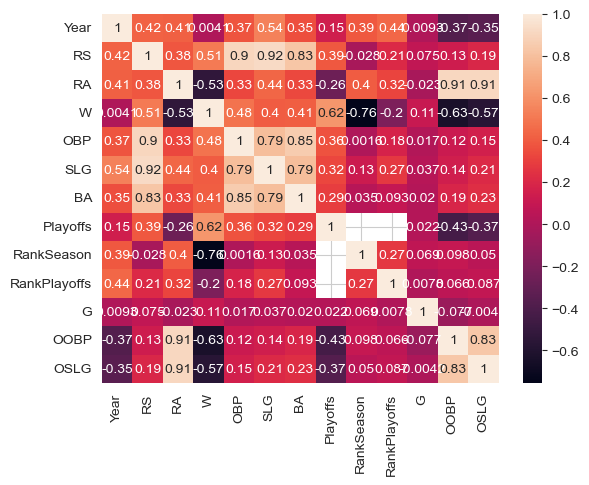

In [11]:
# plot correlations in a heat map
sns.heatmap(bb_df.corr(), annot=True)

## Linear Regression Model

In [15]:
#import packages
from sklearn.model_selection import train_test_split # For splitting the data into training/test datasets
import statsmodels.api as sm # For linear regression modeling
from statsmodels.compat import lzip # for additional capabilities like plotting

In [16]:
# isolating our explanatory (independent) and outcome (dependent) variables

# Include all columns for our explanatory variables except the outcome variable
X = bb_df.drop(["RankSeason","RankPlayoffs","W","OOBP","OSLG"],axis=1) #high correlation set after season

# Create constant (y-intercept) for the model
X = sm.add_constant(X)

# generate our outcome (dependent) variable
y = bb_df[["W"]]

In [17]:
# Create Partition for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [18]:
# show observations in training and test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(924, 11) (924, 1)
(308, 11) (308, 1)


In [19]:
# Show remaining columns
X.columns

Index(['const', 'Team', 'League', 'Year', 'RS', 'RA', 'OBP', 'SLG', 'BA',
       'Playoffs', 'G'],
      dtype='object')

In [20]:
## import ols and create linear model
from statsmodels.formula.api import ols
from sklearn import metrics
model = ols("W ~ RS + RA + OBP + SLG", data=bb_df).fit()
# Model Result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2254.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:50   Log-Likelihood:                -3445.0
No. Observations:                1232   AIC:                             6900.
Df Residuals:                    1227   BIC:                             6926.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.3604      4.523     15.555      0.000      61.486      79.234
RS             0.0936      0.005     20.726      0.000       0.085       0.102
RA            -0.1051      0.001    -77.598      0.000      -0.108      -0.102
OBP           37.0213     17.747      2.086      0.037       2.204      71.839
SLG           16.8323      9.076      1.855      0.064      -0.975      34.639
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.390
Skew:                          -0.034   Prob(JB):                        0.823
Kurtosis:                       3.055   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
## show regression equation from model

## Param Variable
params = model.params

# Model Equation
equation = f"W = {params['Intercept']:.4f} + {params['RS']:.4f}*RS + {params['RA']:.4f}*RA + {params['OBP']:.4f}*OBP + {params['SLG']:.4f}*SLG"
print("Model Equation:")
print(equation)

Model Equation:
W = 70.3604 + 0.0936*RS + -0.1051*RA + 37.0213*OBP + 16.8323*SLG


### Interpretation

From the model created above, we can see that the adjusted R square is high at 88%. This means that 88% of the variance for wins is described by that model. From significance, we can see that the variables runs scored, runs allowed, and on base percentage are all significant at the 95% level as they have p-values less than 0.05. The slugging percentage variable has a p-value of 0.064 so is significant at the 90% level. We left this variable in as we still think that slugging percentage contributes to wins. From the regression equation we can see that wins increase by 0.0936 for every run scored, decreases by -.1051 for every run allowed, increases by 37.0213 for every 1 increase in on base percentage, and increases 16.8323 for every 1 increase in slugging percentage. 

In [22]:
params
## this output is the same as the equation just returning the parameters

Intercept    70.360374
RS            0.093600
RA           -0.105102
OBP          37.021308
SLG          16.832285
dtype: float64

### Performance

Text(0, 0.5, 'Predicted')

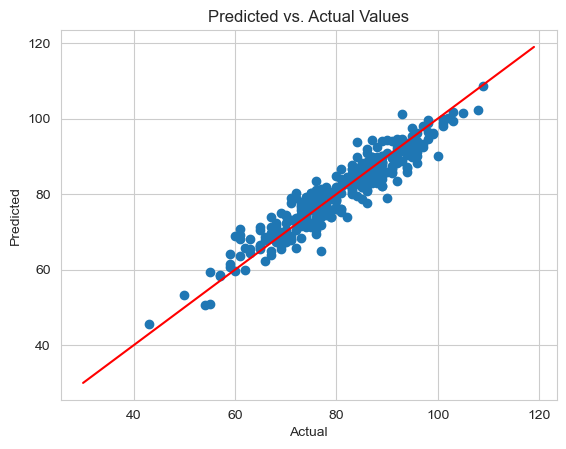

In [23]:
### Predicted vs Actual Values

## Create y predicted residuals
y_pred = model.predict(X_test)

## Create scatterplot
plt.scatter(y_test, y_pred)

# line
plt.plot([x for x in range(30,120)],[x for x in range(30,120)], color='red')

# Labels
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Based on the scatterplot above, we can see how the model performed with our testing data. We can see that its relatively even between values under and over predicted. The values are all centered along the trend line that shows the actual values. The pattern is a positive increase as wins increase which is what we expect to happen. 

In [24]:
# Errors for model performance
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 2.9937758879329155
MSE : 13.870052616795135
RMSE : 3.7242519539895707


The list of errors above show small errors between the testing data and the predicted values. This helps to show that this model performed pretty well and can be used to predict a baseball teams wins.

## GLM

In [25]:
import statsmodels.api as sm # For GLMs
from statsmodels.formula.api import logit, probit, poisson, ols

In [26]:
## Create logit model
bb_logit = logit("Playoffs ~ RS + RA + OBP + SLG", data=bb_df).fit()

Optimization terminated successfully.
         Current function value: 0.253890
         Iterations 9


In [27]:
## show results
print(bb_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1227
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.4899
Time:                        19:13:59   Log-Likelihood:                -312.79
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                1.081e-128
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.9384      4.197     -3.560      0.000     -23.164      -6.713
RS             0.0228      0.004      5.368      0.000       0.015       0.031
RA            -0.0311      0.002    -13.354      0.0

In [28]:
## Find AIC and BIC numbers
print(bb_logit.aic)
print(bb_logit.bic)

635.5856901543323
661.1676608747996


In [29]:
# Predicted Probabilities
bb_logit.predict()

array([0.17447209, 0.41407508, 0.0401499 , ..., 0.92380868, 0.48506885,
       0.00097226])

In [30]:
# marginal effects
bb_mfx = bb_logit.get_margeff(at ='mean')
print(bb_mfx.summary())

        Logit Marginal Effects       
Dep. Variable:               Playoffs
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RS             0.0008      0.000      4.482      0.000       0.000       0.001
RA            -0.0011      0.000     -7.490      0.000      -0.001      -0.001
OBP            1.2300      0.615      2.000      0.045       0.025       2.435
SLG            0.6118      0.300      2.038      0.042       0.023       1.200


### Interpretation

Looking at the logit model output, trying to predict whether a team makes it to the playoffs or not, we see that 49% of the variablilty in the dependent variable is explained by the model. In other words, it is a somewhat useful model. Looking at the AIC and BIC we see high numbers of 635.6 and 661.2 respectively. This is another indicator that this is not a great model trying to predict whether a team makes it to the playoffs or not. 

However, all the variables are significant at a 95% confidence level as their p-value is less than 0.05 indicating that runs scored, runs allowed, on base percentage, and slugging percentage can be used to predict whether a team makes the playoffs or not. Looking at the coefficients all variables other than runs allowed have a positive coefficient indicating that an increase in the variable will result in a higher probability of making it to the playoffs. 

The marginal effects above show that on average an increase of 1 run will result in the 0.08% increase in the probability of making the playoffs. This occurs as well to runs allowed where for every additional run allowed, on average the probability of making the playoffs will decrease by 0.11%.

## Conclusion

In conclusion, we can see that for a team to have a high number of wins, the team will need to score a high number of runs, allow few runs, have a high on base percentage and have a high slugging percentage. The linear regression equation can estimate based on the input variables the number of wins a team will have in a year and the accuracy of the model is relatively high at 88%. The performance of the linear model is also justified through the scatterplot and errors for the model. The scatterplot shows that the predicted values range around the actual values and is evenly distributed between being over and under predicted. The errors for the model with the testing data are low which show that the model performs well.

For making the playoffs, the generalized linear model can be used to see what variables are significant. The model showed that runs scored, runs allowed, on base percentage and slugging percentage are all significant to assessing whether a team will make the playoffs or not. Teams need high runs scored, on base percentages and slugging percentages and low runs allowed. The generalized linear model had an accuracy of 48.9% from the pseudo R square and the AIC and BIC numbers were high at 635.6 and 661.2. This shows us that this model is not very accurate and may not be best to use to predict whether a team is going to the playoffs based on these variables. 